In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, accuracy_score, recall_score, precision_recall_curve, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelBinarizer, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, learning_curve
import imblearn


In [2]:
df = pd.read_csv('churndata_processed.csv')

In [3]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [4]:
df.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.433551,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.377396,0.592219,...,0.390317,0.054664,0.234559,0.430924,0.216669,0.073832,0.116996,0.058924,0.085475,0.114298
std,0.398231,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.424234,0.491457,...,0.487856,0.227340,0.423753,0.495241,0.412004,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_Credit Card',
       'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [7]:
df['churn_value'].tail()

7038    0
7039    0
7040    0
7041    0
7042    0
Name: churn_value, dtype: int64

In [8]:
X = df.drop(columns=['churn_value'], axis=1)
y = df[['churn_value']]

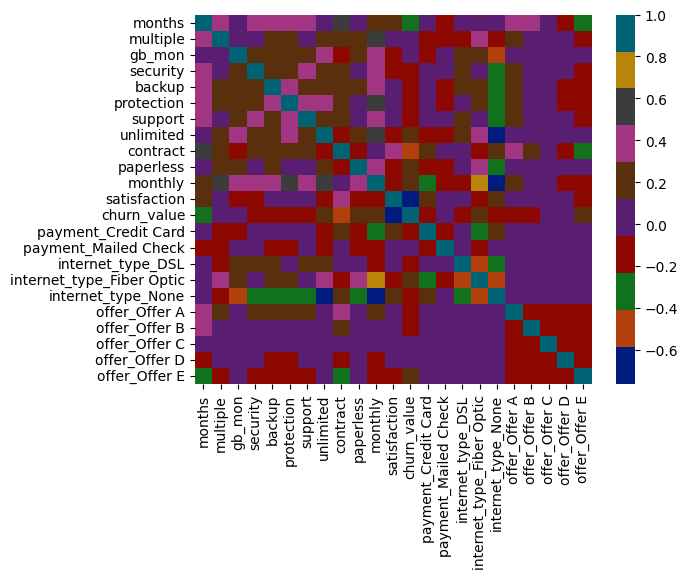

In [14]:
corr = df.corr()
sns.heatmap(corr, cmap=sns.color_palette('dark'))
plt.savefig('figures/correlation.png')



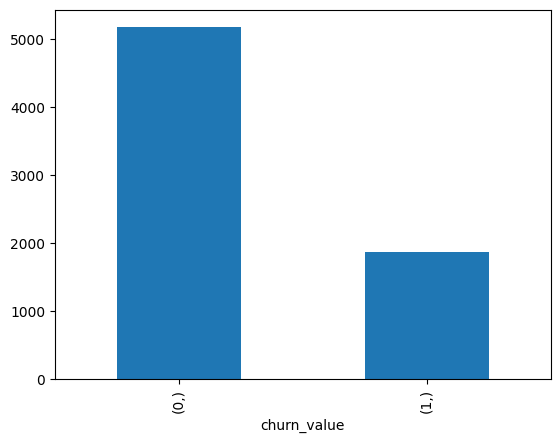

In [15]:
y.value_counts().plot.bar()
plt.savefig('figures/value_counts.png')

In [16]:
y.value_counts()

churn_value
0              5174
1              1869
Name: count, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [18]:
logistic_regression = LogisticRegression(random_state=123, max_iter=1000)
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier(estimator=logistic_regression)


In [19]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote_sampler = SMOTE(random_state=123)
over_sampler = RandomOverSampler()
under_sampler = RandomUnderSampler()

In [20]:
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
X_over, y_over = over_sampler.fit_resample(X_train, y_train)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)
y_smo.value_counts()

churn_value
0              3612
1              3612
Name: count, dtype: int64

In [21]:
models=[("logistic regression", logistic_regression), ("Random forest", random_forest), ("ada boost", ada_boost)]
splits = [("normal", X_train, y_train), ("SMOTE", X_smo, y_smo), ("Over", X_over, y_over), ("Under", X_under, y_under)]
results = []
print("unbalanced:")
for name, model in models:
    for split_name, X_, y_ in splits:
        print(f"{name} --> {split_name}")
        model.fit(X_, y_)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, fbeta, support = precision_recall_fscore_support(y_test, y_pred, average='binary')
        auc = roc_auc_score(y_test, y_pred)
        result = {"model":name, "sampling type":split_name, "accuracy": accuracy, "precision": precision, "recall": recall, "fscore": fbeta, "AUC": auc}
        results.append(result)
df_results = pd.DataFrame(results)
df_results

unbalanced:
logistic regression --> normal
logistic regression --> SMOTE
logistic regression --> Over
logistic regression --> Under
Random forest --> normal


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversio

Random forest --> SMOTE


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest --> Over


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest --> Under


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


ada boost --> normal


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ada boost --> SMOTE


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ada boost --> Over


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ada boost --> Under


c:\Users\one\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,model,sampling type,accuracy,precision,recall,fscore,AUC
0,logistic regression,normal,0.954094,0.950397,0.869328,0.908057,0.926662
1,logistic regression,SMOTE,0.946995,0.873935,0.931034,0.901582,0.941830
2,logistic regression,Over,0.942735,0.850163,0.947368,0.896137,0.944235
3,logistic regression,Under,0.942262,0.852217,0.941924,0.894828,0.942153
4,Random forest,normal,0.953620,0.939806,0.878403,0.908068,0.929278
5,Random forest,SMOTE,0.953147,0.929658,0.887477,0.908078,0.931895
6,Random forest,Over,0.951727,0.922787,0.889292,0.905730,0.931522
7,Random forest,Under,0.944628,0.865320,0.932849,0.897817,0.940816
8,ada boost,normal,0.939423,0.886654,0.880218,0.883424,0.920263
9,ada boost,SMOTE,0.925225,0.828047,0.900181,0.862609,0.917120


In [22]:
df_results.to_csv('results.csv', index=False)